# Replication Notebook for Figs. 4 to 6 and Supplementary materials

This notebook contains the code and figure for replication of Figs. 4 to 6 and Supplmentary materials in XX. 

Please follow the installation instructions provided in README.

## Imports

Run this cell before executing any other cell in this notebook. It will import all necessary modules.

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from pylab import subplot2grid

## Data loading

Evaluate the following cell to load the data. By default, aggregated data files should have been downloaded in the sub-folder called `data`, relative to the path of the notebook itself. If you downloaded the data to a different location, change the value of the `data_path` variable below.

In [3]:
data_path = 'data/'

types = ['all','ideology_visited','party','abs_slant','volume','breadth','similarity','baseline']
kendall_df = []

for t in types:
    k_df = pd.read_csv(data_path + t + '/kendall.csv')
    kendall_df.append(k_df)

pearson_df = pd.read_csv(data_path+'all/pearson.csv')
baseline_df = pd.read_csv(data_path+'all/baseline.csv')

## Figure 4 (Left)

__caption__: _Trustworthiness @ k. Trustworthiness scores from NewsGuard. Bars represent the standard error of the mean._

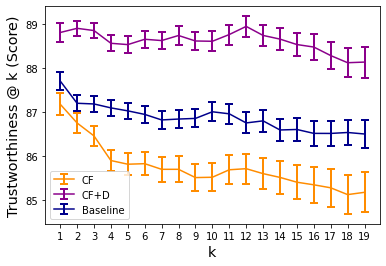

In [4]:
trustworthiness_score_CF = kendall_df[0]['TS_CF'].values
trustworthiness_score_CF_err = kendall_df[0]['TS_CF_err'].values

trustworthiness_score_D = kendall_df[0]['TS_D'].values
trustworthiness_score_D_err = kendall_df[0]['TS_D_err'].values

trustworthiness_score_baseline = baseline_df['TS'].values
trustworthiness_score_baseline_err = baseline_df['TS_err'].values

k_values = kendall_df[0]['k'].values

plt.errorbar(k_values,trustworthiness_score_CF,yerr=trustworthiness_score_CF_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkorange",label="CF")
plt.errorbar(k_values,trustworthiness_score_D,yerr=trustworthiness_score_D_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkmagenta",label="CF+D")
plt.errorbar(k_values,trustworthiness_score_baseline,yerr=trustworthiness_score_baseline_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkblue",label="Baseline")
plt.legend()
plt.xlabel('k',fontsize='x-large')
plt.xticks(k_values,range(1,20))
plt.ylabel('Trustworthiness @ k (Score)',fontsize='x-large')
plt.show()

## Figure 4 (Right)

__caption__: _Trustworthiness @ k. proportion of domains labeled as \`trustworthy\' by NewsGuard. Bars represent the standard error of the mean._

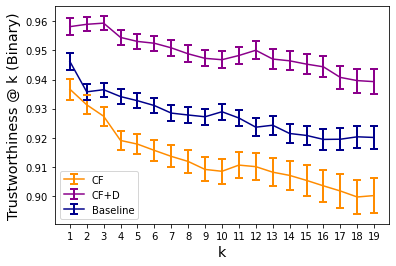

In [5]:
trustworthiness_binary_CF = kendall_df[0]['TB_CF'].values
trustworthiness_binary_CF_err = kendall_df[0]['TB_CF_err'].values

trustworthiness_binary_D = kendall_df[0]['TB_D'].values
trustworthiness_binary_D_err = kendall_df[0]['TB_D_err'].values

trustworthiness_binary_baseline = baseline_df['TB'].values
trustworthiness_binary_baseline_err = baseline_df['TB_err'].values

k_values = kendall_df[0]['k'].values

plt.errorbar(k_values,trustworthiness_binary_CF,
             yerr=trustworthiness_binary_CF_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkorange",label="CF")
plt.errorbar(k_values,trustworthiness_binary_D,yerr=trustworthiness_binary_D_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkmagenta",label="CF+D")
plt.errorbar(k_values,trustworthiness_binary_baseline,yerr=trustworthiness_binary_baseline_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkblue",label="Baseline")
plt.legend()
plt.xlabel('k',fontsize='x-large')
plt.xticks(k_values,range(1,20))
plt.ylabel('Trustworthiness @ k (Binary)',fontsize='x-large')
plt.show()

## Figure 5 (Left)

__caption__: _Performance evaluation of CF+D. Precision@k of CF+D compared to CF (higher is better)._

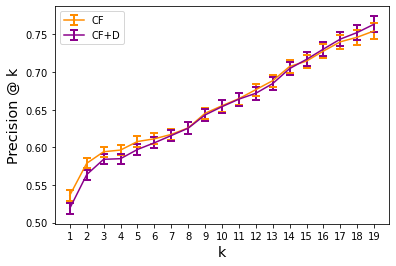

In [6]:
precision_CF = kendall_df[0]['P_CF'].values
precision_CF_err = kendall_df[0]['P_CF_err'].values

precision_D = kendall_df[0]['P_D'].values
precision_D_err = kendall_df[0]['P_D_err'].values

k_values = kendall_df[0]['k'].values

plt.errorbar(k_values,precision_CF,yerr=precision_CF_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkorange",label="CF")
plt.errorbar(k_values,precision_D,yerr=precision_D_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkmagenta",label="CF+D")
plt.legend()
plt.xlabel('k',fontsize='x-large')
plt.xticks(k_values,range(1,20))
plt.ylabel('Precision @ k',fontsize='x-large')
plt.show()

## Figure 5 (Right)

__caption__: _Performance evaluation of CF+D. RMSE@k (lower is better)._

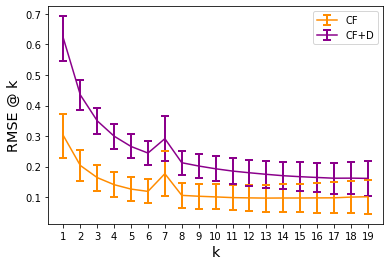

In [7]:
RMSE_CF = kendall_df[0]['R_CF'].values
RMSE_CF_err = kendall_df[0]['R_CF_err'].values

RMSE_D = kendall_df[0]['R_D'].values
RMSE_D_err = kendall_df[0]['R_D_err'].values

k_values = kendall_df[0]['k'].values

plt.errorbar(k_values,RMSE_CF,yerr=RMSE_CF_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkorange",label="CF")
plt.errorbar(k_values,RMSE_D,yerr=RMSE_D_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkmagenta",label="CF+D")
plt.legend()
plt.xlabel('k',fontsize='x-large')
plt.xticks(k_values,range(1,20))
plt.ylabel('RMSE @ k',fontsize='x-large')
plt.show()

## Figure 6

__caption__: _Effect of CF+D by slant and extent of news consumption habits. (a): Ideological slant of visited domains (terciles). (b) Self-reported party ID from YouGov Pulse responses as measured on a 7-point scale (1 - 3: Democrats with leaners, 4: Independents, 5 - 7: Republicans with leaners). (c) Partisanship (absolute slant) of visited domains (terciles). (d) Total number of accesses (terciles). (e) Distinct number of sources (terciles). (f) Similarity with top n most similar users (terciles) (n = 10 is CF neighborhood size) (g) Baseline trustworthiness (terciles)._

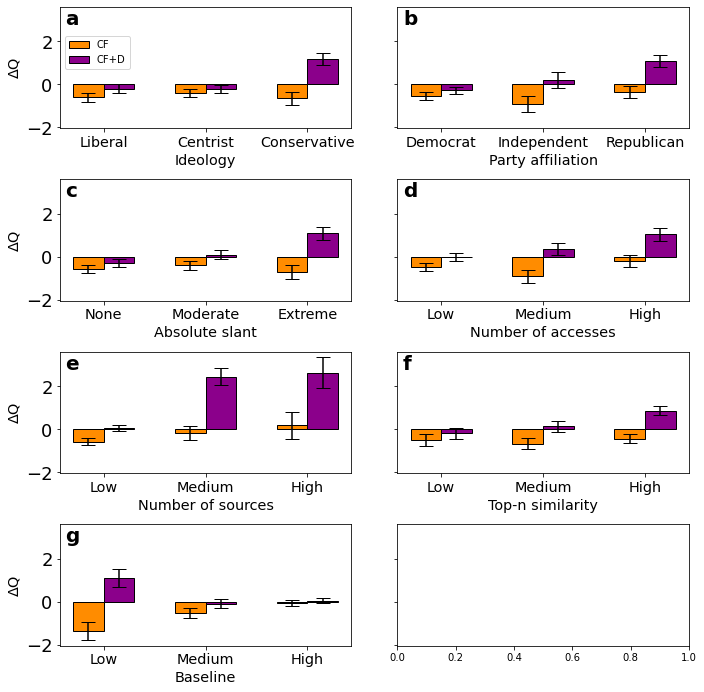

In [8]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharey=True)
fig.tight_layout(pad=3.0)
barWidth = 0.3
num_categories = 3
r1 = np.arange(num_categories)
r2 = [x + barWidth for x in r1]

x_tick_names = [['Liberal', 'Centrist', 'Conservative'],
               ['Democrat', 'Independent', 'Republican'],
               ['None', 'Moderate', 'Extreme'],
               ['Low', 'Medium', 'High'],
               ['Low', 'Medium', 'High'],
               ['Low', 'Medium', 'High'],
               ['Low', 'Medium', 'High']]

x_labels = ['Ideology','Party affiliation','Absolute slant','Number of accesses','Number of sources',
           'Top-n similarity','Baseline']

annotations = ['a','b','c','d','e','f','g']

for i, ax in zip(range(0, 7), axs.ravel()):
    df = kendall_df[i+1]
    row_exp = df.loc[df['k'] == 0]
    
    CF_inc = [row_exp['First_CF'].values[0], row_exp['Second_CF'].values[0], 
              row_exp['Third_CF'].values[0]]
    
    CF_inc_err = [row_exp['First_CF_err'].values[0], row_exp['Second_CF_err'].values[0], 
                  row_exp['Third_CF_err'].values[0]]
    
    D_inc = [row_exp['First_D'].values[0], row_exp['Second_D'].values[0], 
             row_exp['Third_D'].values[0]]
    
    D_inc_err = [row_exp['First_D_err'].values[0], row_exp['Second_D_err'].values[0], 
                 row_exp['Third_D_err'].values[0]]
    
    ax.bar(r1, CF_inc, width = barWidth, color = 'darkorange', edgecolor = 'black', 
           yerr=CF_inc_err, capsize=7, label='CF')
    ax.bar(r2, D_inc, width = barWidth, color = 'darkmagenta', edgecolor = 'black', 
           yerr=D_inc_err, capsize=7, label='CF+D')
    ax.set_xticks([r + barWidth/2 for r in range(num_categories)])
    ax.set_xticklabels(x_tick_names[i],fontsize='x-large')
    ax.set_xlabel(x_labels[i],fontsize='x-large')
    ax.tick_params(axis="y", labelsize=18)
    if i % 2 == 0:
        ax.set_ylabel(r'$\Delta$'+'Q',fontsize='x-large')
    if i == 0:
        ax.legend(loc="upper left", bbox_to_anchor=(0,0.8))
    ax.annotate(annotations[i],xy=(ax.get_xlim()[0]*0.8,2.8),fontsize=20,fontweight="bold")

# Supplementary Materials

## Figures S1 and S2

/home/saumyabhadani/anaconda3/envs/infordiversity_results/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


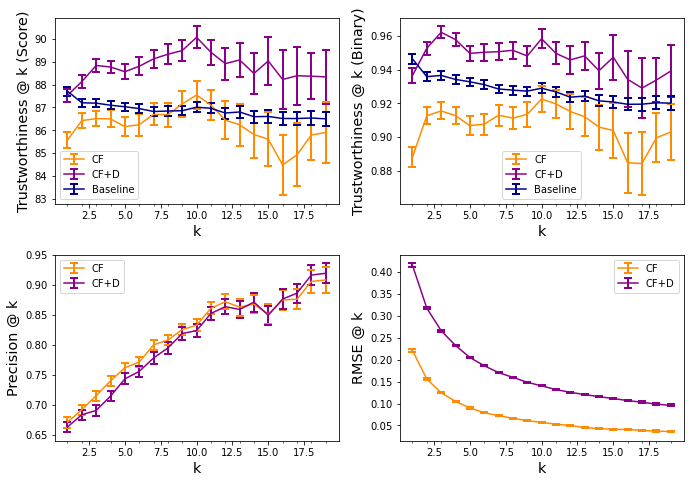

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout(pad=3.0)

metrics = ['TS','TB','P','R']
y_labels = ['Trustworthiness @ k (Score)','Trustworthiness @ k (Binary)','Precision @ k','RMSE @ k']

k_values = pearson_df['k'].values

for i, ax in zip(range(0, 4), axs.ravel()):
    metric = metrics[i]
    CF = pearson_df[metric+'_CF'].values
    CF_err = pearson_df[metric+'_CF_err'].values
    D = pearson_df[metric+'_D'].values
    D_err = pearson_df[metric+'_D_err'].values
    ax.errorbar(k_values,CF,yerr=CF_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkorange",label="CF")
    ax.errorbar(k_values,D,yerr=D_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkmagenta",label="CF+D")
    if i < 2:
        baseline = baseline_df[metric].values
        baseline_err = baseline_df[metric+'_err'].values
        ax.errorbar(k_values,baseline,yerr=baseline_err,capsize=4,elinewidth=2,markeredgewidth=2,color="darkblue",label="Baseline")
    ax.legend()
    ax.set_xlabel('k',fontsize='x-large')
    ax.set_xticks(k_values,range(1,20))
    ax.set_ylabel(y_labels[i],fontsize='x-large')

## Figures S3 - S9

Figures S3 - S9 demonstrate trustworthiness as a function of k for different user categorizations. To create the plot of a particular _user categorization_ change the value of the `user_categorization` variable. Available categorizations are : `Ideology`, `Party affiliation`, `Absolute slant`, `Number of accesses`, `Number of sources`, `Top-n similarity` and `Baseline`. Similarly to create the plot for a particular _k_, change the value of variable `k` 

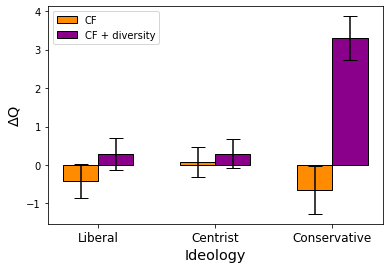

In [10]:
user_categorization = "Ideology"
k = 1

all_categorizations = {"Ideology":1,"Party affiliation":2,"Absolute slant":3,"Number of accesses":4,
                       "Number of sources":5,"Top-n similarity":6,"Baseline":7}

x_tick_names = {"Ideology":['Liberal', 'Centrist', 'Conservative'],
               "Party affiliation":['Democrat', 'Independent', 'Republican'],
               "Absolute slant":['None', 'Moderate', 'Extreme'],
               "Number of accesses":['Low', 'Medium', 'High'],
               "Number of sources":['Low', 'Medium', 'High'],
               "Top-n similarity":['Low', 'Medium', 'High'],
               "Baseline":['Low', 'Medium', 'High']}

df = kendall_df[all_categorizations[user_categorization]]
row_exp = df.loc[df['k'] == k]

CF_inc = [row_exp['First_CF'].values[0], row_exp['Second_CF'].values[0], 
          row_exp['Third_CF'].values[0]]
CF_inc_err = [row_exp['First_CF_err'].values[0], row_exp['Second_CF_err'].values[0], 
              row_exp['Third_CF_err'].values[0]]
D_inc = [row_exp['First_D'].values[0], row_exp['Second_D'].values[0], 
         row_exp['Third_D'].values[0]]
D_inc_err = [row_exp['First_D_err'].values[0], row_exp['Second_D_err'].values[0], 
             row_exp['Third_D_err'].values[0]]

barWidth = 0.3
num_categories = 3
r1 = np.arange(num_categories)
r2 = [x + barWidth for x in r1]
plt.bar(r1, CF_inc, width = barWidth, color = 'darkorange', edgecolor = 'black', 
        yerr=CF_inc_err, capsize=7, label='CF')
plt.bar(r2, D_inc, width = barWidth, color = 'darkmagenta', edgecolor = 'black', 
        yerr=D_inc_err, capsize=7, label='CF + diversity')
plt.xticks([r + barWidth/2 for r in range(num_categories)],x_tick_names[user_categorization],fontsize='large')
plt.ylabel(r'$\Delta$'+'Q',fontsize='x-large')
plt.xlabel(user_categorization,fontsize='x-large')
plt.legend()
plt.show()